In [67]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
import numpy as np







In [2]:
|from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = '/content/drive/MyDrive/ML4EO/2017_2020_1.xlsx'
data = pd.read_excel(DATA_PATH, sheet_name = ['Konc', 'Uncert', 'Konc_season', 'Uncert_season', 'Konc_Season_no_Outliers', 'Met data'])

In [4]:
data_weather = data['Met data']

data_seasonal = data['Konc_Season_no_Outliers']

data_uncert_seasonal = data['Uncert_season']

In [5]:
data_weather

,StartDate,Filter,Season,5 cluster,6 cluster,EndDate,Temp,humidity,Wspeed,WindDir,Rain
0,2017-04-18,P001,W,1.0,1.0,2017-04-19,15.980000,55.603333,NaN,NaN,NaN
1,2017-04-21,P002,W,1.0,1.0,2017-04-22,15.156667,60.977500,NaN,NaN,NaN
2,2017-04-24,P003,W,1.0,1.0,2017-04-25,14.736667,67.497083,NaN,NaN,NaN
3,2017-04-27,P004,W,2.0,2.0,2017-04-28,14.780417,65.113333,NaN,NaN,NaN
4,2017-04-30,P005,W,2.0,2.0,2017-05-01,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
121,NaT,NaN,NaN,NaN,NaN,2018-04-17,15.619285,73.484770,0.893514,275.987876,0.0
122,NaT,NaN,NaN,NaN,NaN,2018-04-20,15.155986,75.451300,1.016778,260.108940,0.0
123,NaT,NaN,NaN,NaN,NaN,2018-04-23,14.689806,54.124632,0.787590,231.148295,0.0
124,NaT,NaN,NaN,NaN,NaN,2018-04-26,15.329694,61.510220,0.724542,245.707779,0.0


In [6]:
data_seasonal

,StartDate,Season,PM2.5,BC,UV-PM,S,Cl,K,Ca,Ti,...,Sb,Te,Ba,W,Hg,Tl,Pb,Bi,U,Si
0,2017-04-18,W,15.000000,5.365000,4.526000,0.395772,0.128254,0.181519,0.287158,0.066612,...,0.084064,0.016886,0.088825,0.000595,0.002115,0.002115,0.003050,0.002115,0.008064,0.580267
1,2017-04-21,W,29.322720,6.127521,4.521561,0.440408,0.148786,0.197886,0.296085,0.069305,...,0.075435,0.016886,0.090760,0.000000,0.002113,0.002115,0.003496,0.002115,0.006130,0.654660
2,2017-04-24,W,22.884123,4.503807,3.679747,2.871576,0.107275,0.291621,0.406187,0.088230,...,0.023226,0.016886,0.054456,0.000446,0.002529,0.002115,0.003958,0.003839,0.008273,1.026626
3,2017-04-27,W,43.116606,4.588589,3.797916,2.499610,0.080345,0.196398,0.202349,0.070287,...,0.014782,0.016886,0.050453,0.001056,0.002115,0.002115,0.002115,0.002115,0.012364,0.580267
4,2017-04-30,W,9.453170,0.765372,0.988656,1.913392,0.075435,0.310963,0.185983,0.068263,...,0.063085,0.016886,0.082428,0.000283,0.002115,0.002115,0.064930,0.002115,0.005728,0.252937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2018-03-11,S,15.400000,2.188470,1.820708,3.099219,0.053905,0.193422,0.218716,0.109507,...,0.020042,0.016886,0.031721,0.001309,0.002115,0.002115,0.002115,0.002115,0.008332,0.967111
110,2018-03-14,S,22.700000,3.744000,3.361000,1.090604,0.074110,0.556461,0.248473,0.097306,...,0.073099,0.060571,0.027540,0.000342,0.002115,0.002115,0.002115,0.002115,0.006859,0.699296
111,2018-03-17,S,3.400000,0.486656,0.674280,1.199218,0.251449,0.169616,0.217228,0.081386,...,0.046466,0.016886,0.045291,0.001309,0.003496,0.002115,0.002115,0.002115,0.008481,0.639781
112,2018-03-20,S,14.500000,2.268863,2.259421,1.440252,0.049085,0.111143,0.171104,0.081386,...,0.014782,0.016886,0.040634,0.000121,0.002115,0.002115,0.002115,0.002115,0.007692,0.252937


In [7]:
weather_data = data_weather.drop(columns=['StartDate', 'Filter', '5 cluster','6 cluster'])

In [8]:
weather_data.rename(columns ={'EndDate':'Date'}, inplace = True)


In [9]:
weather_data

,Season,Date,Temp,humidity,Wspeed,WindDir,Rain
0,W,2017-04-19,15.980000,55.603333,NaN,NaN,NaN
1,W,2017-04-22,15.156667,60.977500,NaN,NaN,NaN
2,W,2017-04-25,14.736667,67.497083,NaN,NaN,NaN
3,W,2017-04-28,14.780417,65.113333,NaN,NaN,NaN
4,W,2017-05-01,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...
121,NaN,2018-04-17,15.619285,73.484770,0.893514,275.987876,0.0
122,NaN,2018-04-20,15.155986,75.451300,1.016778,260.108940,0.0
123,NaN,2018-04-23,14.689806,54.124632,0.787590,231.148295,0.0
124,NaN,2018-04-26,15.329694,61.510220,0.724542,245.707779,0.0


In [10]:
weather_data['Date'] = weather_data['Date'] - pd.Timedelta(days=1)

In [11]:
weather_data

,Season,Date,Temp,humidity,Wspeed,WindDir,Rain
0,W,2017-04-18,15.980000,55.603333,NaN,NaN,NaN
1,W,2017-04-21,15.156667,60.977500,NaN,NaN,NaN
2,W,2017-04-24,14.736667,67.497083,NaN,NaN,NaN
3,W,2017-04-27,14.780417,65.113333,NaN,NaN,NaN
4,W,2017-04-30,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...
121,NaN,2018-04-16,15.619285,73.484770,0.893514,275.987876,0.0
122,NaN,2018-04-19,15.155986,75.451300,1.016778,260.108940,0.0
123,NaN,2018-04-22,14.689806,54.124632,0.787590,231.148295,0.0
124,NaN,2018-04-25,15.329694,61.510220,0.724542,245.707779,0.0


In [12]:
weather_data.set_index('Date', inplace = True)

In [13]:
weather_data.isna().sum()

Season      12
Temp         5
humidity     5
Wspeed      28
WindDir     28
Rain         9
dtype: int64

In [14]:
data_seasonal.rename(columns = {'StartDate': 'Date'}, inplace = True)
data_seasonal.set_index('Date', inplace = True)

In [15]:
data_seasonal

,Season,PM2.5,BC,UV-PM,S,Cl,K,Ca,Ti,V,...,Sb,Te,Ba,W,Hg,Tl,Pb,Bi,U,Si
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-18,W,15.000000,5.365000,4.526000,0.395772,0.128254,0.181519,0.287158,0.066612,0.012543,...,0.084064,0.016886,0.088825,0.000595,0.002115,0.002115,0.003050,0.002115,0.008064,0.580267
2017-04-21,W,29.322720,6.127521,4.521561,0.440408,0.148786,0.197886,0.296085,0.069305,0.000642,...,0.075435,0.016886,0.090760,0.000000,0.002113,0.002115,0.003496,0.002115,0.006130,0.654660
2017-04-24,W,22.884123,4.503807,3.679747,2.871576,0.107275,0.291621,0.406187,0.088230,0.000642,...,0.023226,0.016886,0.054456,0.000446,0.002529,0.002115,0.003958,0.003839,0.008273,1.026626
2017-04-27,W,43.116606,4.588589,3.797916,2.499610,0.080345,0.196398,0.202349,0.070287,0.000642,...,0.014782,0.016886,0.050453,0.001056,0.002115,0.002115,0.002115,0.002115,0.012364,0.580267
2017-04-30,W,9.453170,0.765372,0.988656,1.913392,0.075435,0.310963,0.185983,0.068263,0.022764,...,0.063085,0.016886,0.082428,0.000283,0.002115,0.002115,0.064930,0.002115,0.005728,0.252937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,S,15.400000,2.188470,1.820708,3.099219,0.053905,0.193422,0.218716,0.109507,0.000642,...,0.020042,0.016886,0.031721,0.001309,0.002115,0.002115,0.002115,0.002115,0.008332,0.967111
2018-03-14,S,22.700000,3.744000,3.361000,1.090604,0.074110,0.556461,0.248473,0.097306,0.000642,...,0.073099,0.060571,0.027540,0.000342,0.002115,0.002115,0.002115,0.002115,0.006859,0.699296
2018-03-17,S,3.400000,0.486656,0.674280,1.199218,0.251449,0.169616,0.217228,0.081386,0.000642,...,0.046466,0.016886,0.045291,0.001309,0.003496,0.002115,0.002115,0.002115,0.008481,0.639781


In [16]:
weather_data

,Season,Temp,humidity,Wspeed,WindDir,Rain
Date,,,,,,
2017-04-18,W,15.980000,55.603333,NaN,NaN,NaN
2017-04-21,W,15.156667,60.977500,NaN,NaN,NaN
2017-04-24,W,14.736667,67.497083,NaN,NaN,NaN
2017-04-27,W,14.780417,65.113333,NaN,NaN,NaN
2017-04-30,W,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...
2018-04-16,NaN,15.619285,73.484770,0.893514,275.987876,0.0
2018-04-19,NaN,15.155986,75.451300,1.016778,260.108940,0.0
2018-04-22,NaN,14.689806,54.124632,0.787590,231.148295,0.0


In [17]:
type(data_seasonal.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
merged_df = data_seasonal.merge(weather_data, on = 'Date')

In [19]:
merged_df

,Season_x,PM2.5,BC,UV-PM,S,Cl,K,Ca,Ti,V,...,Pb,Bi,U,Si,Season_y,Temp,humidity,Wspeed,WindDir,Rain
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-18,W,15.000000,5.365000,4.526000,0.395772,0.128254,0.181519,0.287158,0.066612,0.012543,...,0.003050,0.002115,0.008064,0.580267,W,15.980000,55.603333,NaN,NaN,NaN
2017-04-21,W,29.322720,6.127521,4.521561,0.440408,0.148786,0.197886,0.296085,0.069305,0.000642,...,0.003496,0.002115,0.006130,0.654660,W,15.156667,60.977500,NaN,NaN,NaN
2017-04-24,W,22.884123,4.503807,3.679747,2.871576,0.107275,0.291621,0.406187,0.088230,0.000642,...,0.003958,0.003839,0.008273,1.026626,W,14.736667,67.497083,NaN,NaN,NaN
2017-04-27,W,43.116606,4.588589,3.797916,2.499610,0.080345,0.196398,0.202349,0.070287,0.000642,...,0.002115,0.002115,0.012364,0.580267,W,14.780417,65.113333,NaN,NaN,NaN
2017-04-30,W,9.453170,0.765372,0.988656,1.913392,0.075435,0.310963,0.185983,0.068263,0.022764,...,0.064930,0.002115,0.005728,0.252937,W,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,S,15.400000,2.188470,1.820708,3.099219,0.053905,0.193422,0.218716,0.109507,0.000642,...,0.002115,0.002115,0.008332,0.967111,S,18.095847,65.046403,0.853174,264.212409,0.0
2018-03-14,S,22.700000,3.744000,3.361000,1.090604,0.074110,0.556461,0.248473,0.097306,0.000642,...,0.002115,0.002115,0.006859,0.699296,S,21.393215,51.439299,1.022951,238.757177,0.0
2018-03-17,S,3.400000,0.486656,0.674280,1.199218,0.251449,0.169616,0.217228,0.081386,0.000642,...,0.002115,0.002115,0.008481,0.639781,S,16.047521,73.515771,2.129063,64.278530,0.0


In [20]:
le = LabelEncoder()
merged_df['Season_x'] = le.fit_transform(merged_df['Season_x'])

In [21]:
merged_df

,Season_x,PM2.5,BC,UV-PM,S,Cl,K,Ca,Ti,V,...,Pb,Bi,U,Si,Season_y,Temp,humidity,Wspeed,WindDir,Rain
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-18,1,15.000000,5.365000,4.526000,0.395772,0.128254,0.181519,0.287158,0.066612,0.012543,...,0.003050,0.002115,0.008064,0.580267,W,15.980000,55.603333,NaN,NaN,NaN
2017-04-21,1,29.322720,6.127521,4.521561,0.440408,0.148786,0.197886,0.296085,0.069305,0.000642,...,0.003496,0.002115,0.006130,0.654660,W,15.156667,60.977500,NaN,NaN,NaN
2017-04-24,1,22.884123,4.503807,3.679747,2.871576,0.107275,0.291621,0.406187,0.088230,0.000642,...,0.003958,0.003839,0.008273,1.026626,W,14.736667,67.497083,NaN,NaN,NaN
2017-04-27,1,43.116606,4.588589,3.797916,2.499610,0.080345,0.196398,0.202349,0.070287,0.000642,...,0.002115,0.002115,0.012364,0.580267,W,14.780417,65.113333,NaN,NaN,NaN
2017-04-30,1,9.453170,0.765372,0.988656,1.913392,0.075435,0.310963,0.185983,0.068263,0.022764,...,0.064930,0.002115,0.005728,0.252937,W,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,0,15.400000,2.188470,1.820708,3.099219,0.053905,0.193422,0.218716,0.109507,0.000642,...,0.002115,0.002115,0.008332,0.967111,S,18.095847,65.046403,0.853174,264.212409,0.0
2018-03-14,0,22.700000,3.744000,3.361000,1.090604,0.074110,0.556461,0.248473,0.097306,0.000642,...,0.002115,0.002115,0.006859,0.699296,S,21.393215,51.439299,1.022951,238.757177,0.0
2018-03-17,0,3.400000,0.486656,0.674280,1.199218,0.251449,0.169616,0.217228,0.081386,0.000642,...,0.002115,0.002115,0.008481,0.639781,S,16.047521,73.515771,2.129063,64.278530,0.0


<ipython-input-22-806af93ea212>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


<Axes: >

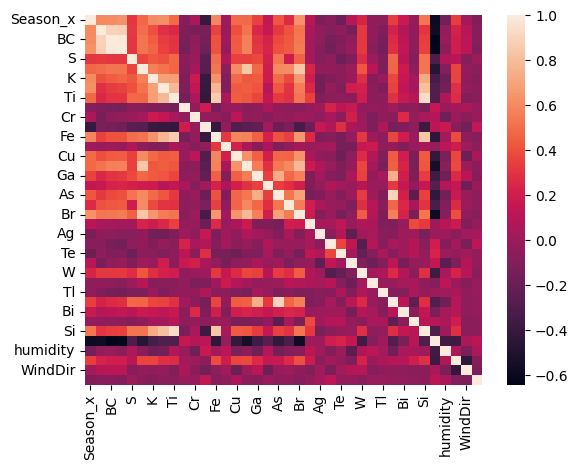

In [22]:
corr = merged_df.corr()
sns.heatmap(corr)

In [23]:
corr['PM2.5']

Season_x    0.597082
PM2.5       1.000000
BC          0.896129
UV-PM       0.878636
S           0.323903
Cl          0.494632
K           0.400360
Ca          0.282245
Ti          0.254001
V          -0.103187
Cr         -0.139783
Mn         -0.123043
Fe          0.355604
Ni         -0.009268
Cu          0.391785
Zn          0.518114
Ga          0.246498
Ge          0.163648
As          0.319547
Se          0.405684
Br          0.531224
Sr          0.050803
Ag         -0.039110
Sb         -0.085245
Te         -0.057648
Ba         -0.138186
W           0.316327
Hg         -0.041517
Tl         -0.107190
Pb          0.220174
Bi          0.079255
U          -0.043184
Si          0.301836
Temp       -0.565677
humidity   -0.033837
Wspeed      0.226002
WindDir     0.097464
Rain       -0.080842
Name: PM2.5, dtype: float64

In [30]:
merged_df.drop(['Season_y'], axis=1, inplace=True)

In [32]:
merged_df


,Season_x,PM2.5,BC,UV-PM,S,Cl,K,Ca,Ti,V,...,Tl,Pb,Bi,U,Si,Temp,humidity,Wspeed,WindDir,Rain
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-18,1,15.000000,5.365000,4.526000,0.395772,0.128254,0.181519,0.287158,0.066612,0.012543,...,0.002115,0.003050,0.002115,0.008064,0.580267,15.980000,55.603333,NaN,NaN,NaN
2017-04-21,1,29.322720,6.127521,4.521561,0.440408,0.148786,0.197886,0.296085,0.069305,0.000642,...,0.002115,0.003496,0.002115,0.006130,0.654660,15.156667,60.977500,NaN,NaN,NaN
2017-04-24,1,22.884123,4.503807,3.679747,2.871576,0.107275,0.291621,0.406187,0.088230,0.000642,...,0.002115,0.003958,0.003839,0.008273,1.026626,14.736667,67.497083,NaN,NaN,NaN
2017-04-27,1,43.116606,4.588589,3.797916,2.499610,0.080345,0.196398,0.202349,0.070287,0.000642,...,0.002115,0.002115,0.002115,0.012364,0.580267,14.780417,65.113333,NaN,NaN,NaN
2017-04-30,1,9.453170,0.765372,0.988656,1.913392,0.075435,0.310963,0.185983,0.068263,0.022764,...,0.002115,0.064930,0.002115,0.005728,0.252937,16.349583,59.778750,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,0,15.400000,2.188470,1.820708,3.099219,0.053905,0.193422,0.218716,0.109507,0.000642,...,0.002115,0.002115,0.002115,0.008332,0.967111,18.095847,65.046403,0.853174,264.212409,0.0
2018-03-14,0,22.700000,3.744000,3.361000,1.090604,0.074110,0.556461,0.248473,0.097306,0.000642,...,0.002115,0.002115,0.002115,0.006859,0.699296,21.393215,51.439299,1.022951,238.757177,0.0
2018-03-17,0,3.400000,0.486656,0.674280,1.199218,0.251449,0.169616,0.217228,0.081386,0.000642,...,0.002115,0.002115,0.002115,0.008481,0.639781,16.047521,73.515771,2.129063,64.278530,0.0


In [36]:
merged_df.fillna(merged_df.mean(), inplace=True)

In [56]:
scaler = StandardScaler()
X_indep = merged_df.drop(['PM2.5'], axis=1)
y = merged_df['PM2.5']
data_scaled = scaler.fit_transform(X_indep)

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(data_scaled, y)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)

In [57]:
len(X_indep.columns)


37

In [58]:
pd.DataFrame(data_scaled, columns = X_indep.columns)

,Season_x,BC,UV-PM,S,Cl,K,Ca,Ti,V,Cr,...,Tl,Pb,Bi,U,Si,Temp,humidity,Wspeed,WindDir,Rain
0,0.899735,0.503962,0.649340,-1.027436,0.036377,-0.705901,0.000212,-0.706261,1.938509,-0.192651,...,-0.228837,-0.347638,-0.390484,0.037647,-0.462967,-0.505601,0.161856,0.000000,0.000000,0.000000
1,0.899735,0.753388,0.647060,-0.993080,0.207076,-0.663463,0.048251,-0.602945,-0.171588,-0.192651,...,-0.228837,-0.331296,-0.390484,-0.666262,-0.328397,-0.751278,0.540873,0.000000,0.000000,0.000000
2,0.899735,0.222260,0.214826,0.878197,-0.138033,-0.420410,0.640727,0.123125,-0.171588,-0.192651,...,-0.228837,-0.314409,3.201606,0.113453,0.344451,-0.876603,1.000672,0.000000,0.000000,0.000000
3,0.899735,0.249992,0.275500,0.591894,-0.361920,-0.667321,-0.456155,-0.565272,-0.171588,-0.192651,...,-0.228837,-0.381886,-0.390484,1.602492,-0.462967,-0.863548,0.832556,0.000000,0.000000,0.000000
4,0.899735,-1.000608,-1.166932,0.140680,-0.402739,-0.370257,-0.544226,-0.642902,3.750857,-0.192651,...,-0.228837,1.917880,-0.390484,-0.812459,-1.055073,-0.395320,0.456330,0.000000,0.000000,-0.101206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.111438,-0.535103,-0.739710,1.053415,-0.581726,-0.675037,-0.368084,0.939382,-0.171588,-0.192651,...,-0.228837,-0.381886,-0.390484,0.135112,0.236795,0.125753,0.827836,-1.725057,1.419813,-0.101206
110,-1.111438,-0.026279,0.051163,-0.492622,-0.413748,0.266311,-0.207955,0.471318,-0.171588,-0.192651,...,-0.228837,-0.381886,-0.390484,-0.400942,-0.247655,1.109664,-0.131816,-1.386254,1.034236,-0.101206
111,-1.111438,-1.091779,-1.328350,-0.409022,1.060569,-0.736765,-0.376090,-0.139448,-0.171588,-0.192651,...,-0.228837,-0.381886,-0.390484,0.189259,-0.355311,-0.485453,1.425145,0.821064,-1.608640,-0.101206
112,-1.111438,-0.508806,-0.514450,-0.223497,-0.621803,-0.888384,-0.624290,-0.139448,-0.171588,-0.192651,...,-0.228837,-0.381886,-0.390484,-0.097720,-1.055073,0.246893,1.228577,-1.228037,-1.098928,-0.101206


In [59]:
predictors = X_indep.columns
cols = []
for i in range(len(selected_features)):
  feats = predictors[selected_features[i]]
  cols.append(feats)

cols


['Season_x', 'BC', 'UV-PM', 'Cl', 'K', 'Cu', 'Zn', 'Se', 'Br', 'Temp']

In [60]:
selected_features

array([ 0,  1,  2,  4,  5, 13, 14, 18, 19, 32])

In [61]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_scaled)

In [85]:
data_pca_df = pd.DataFrame(data_pca, columns = cols )
data_pca_df


,Season_x,BC,UV-PM,Cl,K,Cu,Zn,Se,Br,Temp
0,-0.116079,-1.157889,1.035176,0.693312,-1.331268,-1.879594,-1.888455,-1.791731,-0.076025,-0.939837
1,0.017100,-0.419807,0.533525,-0.612723,-1.242801,-0.994384,-2.153510,-0.914146,-0.011526,-1.124152
2,1.393531,0.029699,-1.555786,0.197619,0.184135,0.906628,-0.928685,1.910054,1.565593,0.228518
3,-0.460433,0.154229,-1.955474,-0.683104,-0.274342,0.130210,0.116222,-0.321239,-0.011539,0.174734
4,-0.116206,-1.407285,2.333412,1.491253,0.830590,-0.304519,-1.243970,-1.876436,-0.786567,0.132728
...,...,...,...,...,...,...,...,...,...,...
109,-1.325493,0.447103,-0.596006,-1.144775,1.062337,2.208431,1.739966,0.028961,1.434314,0.740134
110,-2.232463,0.977886,0.641822,0.735868,-1.698863,1.933429,1.273385,-0.460126,2.050916,-0.122641
111,-1.511559,1.028378,-2.243153,2.232879,1.325335,1.156026,-1.778627,0.526544,-0.902820,-2.265248
112,-2.748532,0.272722,-0.886332,-0.250952,0.668302,-0.161448,0.192362,0.220017,0.964294,-0.885685


In [86]:
model = RandomForestRegressor(n_estimators=3000, random_state=42)
kfold = KFold(n_splits=12, shuffle=True, random_state=42)
scores = cross_val_score(model, data_pca_df, y, cv=kfold, scoring='neg_mean_squared_error')



In [87]:
scores

array([ -84.47301624,  -42.65099053,  -70.15394047, -119.20304332,
       -183.41295548,  -34.59100223, -283.87920161,  -83.33276335,
       -229.26896024,  -46.7697787 ,  -46.52931141,  -97.57655034])

In [88]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 9.19092032,  6.53077258,  8.37579492, 10.91801462, 13.54300393,
        5.88141158, 16.84871513,  9.12867807, 15.14163004,  6.83884337,
        6.82123973,  9.87808435])